In [3]:
s = 1e-5

import pandas as pd
from sklearn import metrics
import tensorflow as tf
################################ MSE ################################
def MSE(y_true, y_pred):
    return tf.reduce_mean(tf.math.square(y_true-y_pred))

################################ BCE ################################
def BCE(y_true, y_pred):
    return -tf.reduce_mean(y_true*tf.math.log(y_pred+s)+(1-y_true)*tf.math.log(1-y_pred+s))

################################ WBCE ################################
def WBCE(y_true, y_pred):
    N = batch    # batch_size
    y1 = tf.reduce_sum(y_true)
    y0 = N-y1
    w1 = y0/N #N/y1
    w0 = y1/N #N/y0
    return -tf.reduce_mean(w1*y_true*tf.math.log(y_pred+s)+w0*(1-y_true)*tf.math.log(1-y_pred+s))

################################ TN/FP/FN/TP ################################
def confusion_matrix(y_true, y_pred):
    N = batch    # batch_size
    y1 = tf.reduce_sum(y_true)
    y0 = N-y1
    TN = N-tf.reduce_sum(y_true)-tf.reduce_sum(y_pred)+tf.reduce_sum(y_true*y_pred)
    FP = tf.reduce_sum(y_pred)-tf.reduce_sum(y_true*y_pred)
    FN = tf.reduce_sum(y_true)-tf.reduce_sum(y_true*y_pred)
    TP = tf.reduce_sum(y_true*y_pred)
    return N, y1, y0, TN, FP, FN, TP

################################ make_lists ################################
def make_lists():
    list_acc = []
    list_f1 = []
    list_gmean = []
    list_bacc = []
    list_pre = []
    list_rec = []
    list_spe = []
    return list_acc, list_f1, list_gmean, list_bacc, list_pre, list_rec, list_spe
    
############################### Results ###############################
def get_results(y_true, y_pred):
    TN = metrics.confusion_matrix(y_true, y_pred)[0,0]
    FP = metrics.confusion_matrix(y_true, y_pred)[0,1]
    FN = metrics.confusion_matrix(y_true, y_pred)[1,0]
    TP = metrics.confusion_matrix(y_true, y_pred)[1,1]
    acc = np.round((TP+TN)/(TP+TN+FP+FN),4)
    if TP+FP == 0:
        pre = 0
    else:
        pre = np.round(TP/(TP+FP),4)
    rec = np.round(TP/(TP+FN),4)
    spe = np.round(TN/(TN+FP),4)
    f1 = np.round(TP/(TP + 0.5*(FP+FN)),4)
    f05 = np.round(TP/(TP + 0.8*FP + 0.2*FN),4)
    f2 = np.round(TP/(TP + 0.2*FP + 0.8*FN),4)
    gmean = np.round(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5,4)
    bacc = np.round(0.5*(TP/(TP+FN) + TN/(TN+FP)),4)
    
    list_acc.append(acc)
    list_f1.append(f1)
    list_gmean.append(gmean)
    list_bacc.append(bacc)
    list_pre.append(pre)
    list_rec.append(rec)
    list_spe.append(spe)

################################ SPL ################################
def splitter(y_pred):
    return (0.5)**2-(y_pred-0.5)**2

# =================================== Fbeta =================================== #
################################ Pure_Fbeta ################################
def Pure_Fbeta(y_true, y_pred):
    b = 1 
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    F_beta = ((1+b**2)*TP) / ((b**2)*y1 + tf.reduce_sum(y_pred)+s)  # (1+b**2)TP/((1+b**2)TP+FP+b**2FN)
    return 1-F_beta

################################ Any_Fbeta ################################
def Any_Fbeta(y_true, y_pred):
    b = 1 
    y_pred = 1/(1+tf.math.exp(-L*(y_pred-0.5)))
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    F_beta = ((1+b**2)*TP) / ((b**2)*y1 + tf.reduce_sum(y_pred)+s)  # (1+b**2)TP/((1+b**2)TP+FP+b**2FN)
    return 1-F_beta

################################ WBCEFL ################################
def WBCEFL(y_true, y_pred):
    b = 1
    WBCEloss = WBCE(y_true, y_pred)
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    F_beta = ((1+b**2)*TP) / ((b**2)*y1 + tf.reduce_sum(y_pred)+s)  # (1+b**2)TP/((1+b**2)TP+FP+b**2FN)
    return (1-r)*WBCEloss+(r)*(1-F_beta)

################################ SPLFL ################################
def SPLFL(y_true, y_pred):
    b = 1
    SPL = splitter(y_pred)
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    F_beta = ((1+b**2)*TP) / ((b**2)*y1 + tf.reduce_sum(y_pred)+s)  # (1+b**2)TP/((1+b**2)TP+FP+b**2FN)
    return (1-w)*SPL+(w)*(1-F_beta)

# =================================== Gmean =================================== #
################################ Pure_Gmean ################################
def Pure_Gmean(y_true, y_pred):
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    sur_gmean = (TP*TN)/(y1*y0+s)
    return 1-sur_gmean

################################ Any_Gmean ################################
def Any_Gmean(y_true, y_pred):
    y_pred = 1/(1+tf.math.exp(-L*(y_pred-0.5)))
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    sur_gmean = (TP*TN)/(y1*y0+s)
    return 1-sur_gmean

################################ WBCEGL ################################
def WBCEGL(y_true, y_pred):
    WBCEloss = WBCE(y_true, y_pred)
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    sur_gmean = (TP*TN)/(y1*y0+s)
    return (1-r)*WBCEloss+(r)*(1-sur_gmean)

################################ SPLGL ################################
def SPLGL(y_true, y_pred):
    SPL = splitter(y_pred)
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    sur_gmean = (TP*TN)/(y1*y0+s)
    return (1-w)*SPL+(w)*(1-sur_gmean)

# =================================== BAccu =================================== #
################################ Pure_BAccu ################################
def Pure_BAccu(y_true, y_pred):
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    baccu = (y0*TP+y1*TN) / (2*y1*y0+s)
    return 1-baccu

################################ Any_BAccu ################################
def Any_BAccu(y_true, y_pred):
    y_pred = 1/(1+tf.math.exp(-L*(y_pred-0.5)))
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    baccu = (y0*TP+y1*TN) / (2*y1*y0+s)
    return 1-baccu

################################ WBCEBL ################################
def WBCEBL(y_true, y_pred):
    WBCEloss = WBCE(y_true, y_pred)
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    baccu = (y0*TP+y1*TN) / (2*y1*y0+s)
    return (1-r)*WBCEloss+(r)*(1-baccu)

################################ SPLBL ################################
def SPLBL(y_true, y_pred):
    SPL = splitter(y_pred)
    N, y1, y0, TN, FP, FN, TP = confusion_matrix(y_true, y_pred)
    baccu = (y0*TP+y1*TN) / (2*y1*y0+s)
    return (1-w)*SPL+(w)*(1-baccu)

In [ ]:
res = pd.DataFrame({'MSE':[0, 0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','G_Mean','B_Acc','Pre','Rec','Spe'])
res

# Step1: Select One Dataset

## 1)MNIST_784

In [4]:
from keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


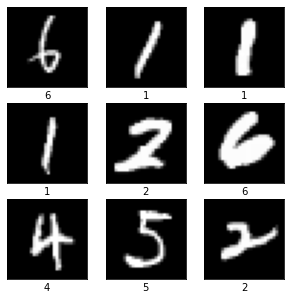

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7','8','9']
sample_size = 9
random_idx = np.random.randint(10000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[idx], cmap='gray')
    plt.xlabel(class_names[y_test[idx]])
plt.show()

In [6]:
X_test = np.repeat(X_test[..., np.newaxis], 3, -1)
X_test.shape

(10000, 28, 28, 3)

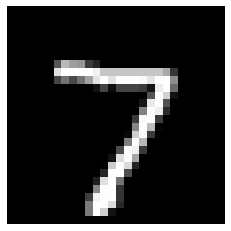

7 7


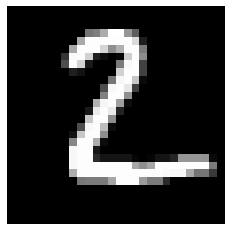

2 2


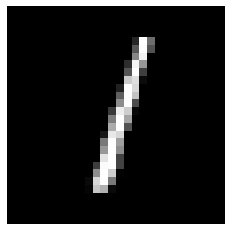

1 1


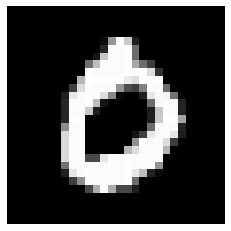

0 0


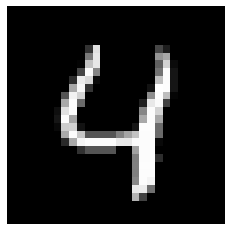

4 4


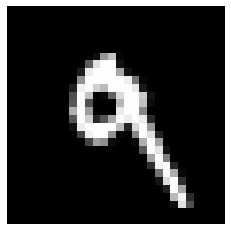

9 9


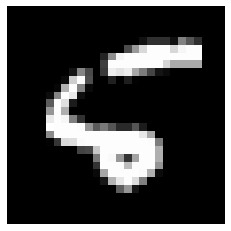

5 5


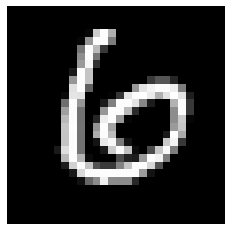

6 6


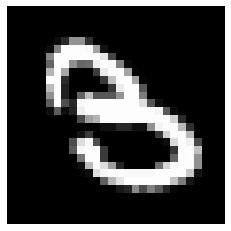

3 3


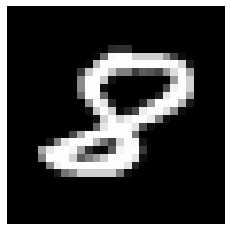

8 8


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

class_names = ['0', '1', '2', '3', '4', '5', '6', '7','8','9']
y_list = []

for i in range(100):
    if y_test[i] in y_list:
        continue
    y_list.append(y_test[i])    
    some_digit = X_test[i]
    # some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(some_digit, cmap = "binary")
    plt.axis("off")
    plt.show()
    print(y_test[i], class_names[y_test[i]])

In [8]:
pd.Series(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [9]:
# Picking only label (7, 8)->0 & (9)->1
idx_7 = []
idx_8 = []
idx_9 = []
for i in range(len(y_test)):
    if list(y_test)[i] == 7:
        idx_7.append(i)
    if list(y_test)[i] == 8:
        idx_8.append(i)
    if list(y_test)[i] == 9:
        idx_9.append(i)
print(len(idx_7), len(idx_8), len(idx_9))

1028 974 1009


In [10]:
idx = idx_7[:110] + idx_8[:70] + idx_9[:20]
idx.sort()

In [11]:
X = []
y = []
for i in idx:
    X.append(X_test[i])
    y.append(y_test[i])
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(200, 28, 28, 3) (200,)


In [12]:
pd.Series(y).value_counts()

7    110
8     70
9     20
dtype: int64

In [13]:
y9 = list(y)

y_9 = []
for i in range(len(y9)):
    if y9[i] == 9:
        y_9.append(1)
    else:
        y_9.append(0)
y_9 = np.array(y_9)
y = y_9
print(pd.Series(y).value_counts())

0    180
1     20
dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2)

epochs = 20
batch = 32

from keras.callbacks import EarlyStopping, ModelCheckpoint

## 2)Fashion MNIST

In [ ]:
from keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print(X_test.shape, y_test.shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']
sample_size = 9
random_idx = np.random.randint(10000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[idx], cmap='gray')
    plt.xlabel(class_names[y_test[idx]])
plt.show()

In [ ]:
# ResNet에 맞도록 수정 (rgb 컬러도 필요한데, 데이터가 흑백데이터다)
X_test = np.repeat(X_test[..., np.newaxis], 3, -1)
X_test.shape

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']
y_list = []

for i in range(100):
    if y_test[i] in y_list:
        continue
    y_list.append(y_test[i])    
    some_digit = X_test[i]
    # some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(some_digit, cmap = "binary")
    plt.axis("off")
    plt.show()
    print(y_test[i], class_names[y_test[i]])

In [ ]:
pd.Series(y_test).value_counts()

In [ ]:
# Picking only label (4, 6)->0 & 2->1
idx_2 = []
idx_4 = []
# idx_6 = []
for i in range(len(y_test)):
    if list(y_test)[i] == 2:
        idx_2.append(i)
    if list(y_test)[i] == 4:
        idx_4.append(i)
#     if list(y_test)[i] == 6:
#         idx_6.append(i)
print(len(idx_2), len(idx_4)) #, len(idx_6))

In [ ]:
idx = idx_2[:50] + idx_4[:150] # + idx_6[:110]
idx.sort()

In [ ]:
X = []
y = []
for i in idx:
    X.append(X_test[i])
    y.append(y_test[i])
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

In [ ]:
pd.Series(y).value_counts()

In [ ]:
y2 = list(y)

y_2 = []
for i in range(len(y2)):
    if y2[i] == 2:
        y_2.append(1)
    else:
        y_2.append(0)
y_2 = np.array(y_2)
y = y_2
print(pd.Series(y).value_counts())

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2)

epochs = 20
batch = 64

from keras.callbacks import EarlyStopping, ModelCheckpoint

## 3)CIFAR-10

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_test.shape, y_test.shape)

In [ ]:
y_test = y_test.reshape(10000,)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship','truck']
y_list = []

for i in range(100):
    if y_test[i] in y_list:
        continue
    y_list.append(y_test[i])    
    some_digit = X_test[i]
    # some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(some_digit, cmap = "binary")
    plt.axis("off")
    plt.show()
    print(y_test[i], class_names[y_test[i]])

In [ ]:
pd.Series(y_test).value_counts()

In [ ]:
# Picking only label (1, 7)->0 & 9->1
idx_1 = []
# idx_7 = []
idx_9 = []
for i in range(len(y_test)):
    if list(y_test)[i] == 1:
        idx_1.append(i)
#     if list(y_test)[i] == 7:
#         idx_7.append(i)
    if list(y_test)[i] == 9:
        idx_9.append(i)
print(len(idx_1), len(idx_9))

In [ ]:
idx = idx_1[:160] + idx_9[:40]
idx.sort()

In [ ]:
X = []
y = []
for i in idx:
    X.append(X_test[i])
    y.append(y_test[i])
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

In [ ]:
pd.Series(y).value_counts()

In [ ]:
y9 = list(y)

y_9 = []
for i in range(len(y9)):
    if y9[i] == 9:
        y_9.append(1)
    else:
        y_9.append(0)
y_9 = np.array(y_9)
y = y_9
print(pd.Series(y_9).value_counts())

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 2)

epochs = 20
batch = 32

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Step2: Select One Architecture

## 1)ResNet50

In [31]:
# ResNet
import tensorflow as tf
import numpy as np
from keras import optimizers

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential

def create_model():
    # Remove "Fully Connected layer"
    resnet = ResNet50(weights='imagenet', include_top=False)
    # Parameter update
    for layer in resnet.layers:
        layer.trainable = True
    # Add "Fully connected layer" for binary classification
    r = resnet.output
    r = GlobalAveragePooling2D()(r)
    r = Dense(16, activation='relu')(r)
    predictions = Dense(1, activation='sigmoid')(r)
    model = Model(resnet.input, predictions)
    return model

In [1]:
mse_acc = []
mse_f1 = []
mse_gmean = []
mse_bacc = []
mse_pre = []
mse_rec = []
mse_spe = []

for i in range(5):
    print('#'*50,'{0}th repeat'.format(i+1),'#'*50)
    list_acc, list_f1, list_gmean, list_bacc, list_pre, list_rec, list_spe = make_lists()

    n_iter=0
    ###################### BCE ##############################
    for train_index, test_index in skf.split(X, y):
        n_iter += 1
        X_train = X[train_index]
        y_train= y[train_index]
        X_test = X[test_index]
        y_test= y[test_index]
#         print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        y_train = y_train.astype(float)
        X_test = np.array(X_test)
        y_test = np.array(y_test)
        y_test = y_test.astype(float)

        model = create_model()
        early_stopping = EarlyStopping(monitor='loss')
    #     check_point = ModelCheckpoint('best_model.h5', monitor="val_loss", save_best_only=True, save_weights_only=True)
        opt = optimizers.Adam(learning_rate = 0.0003)
        model.compile(optimizer=opt, loss=MSE, metrics=['accuracy'])
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size = batch, )
                            #callbacks=[early_stopping]) #, check_point])
#         plt.plot(history.history['loss'], label='loss')
#         plt.ylim([0, 1])
#         plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
#         plt.ylabel('Loss',fontweight="bold",fontsize = 15)
#         plt.title("Cost Function",fontweight="bold",fontsize = 20)
#         plt.legend()
#         plt.show()
        predicted = []
    #     model.load_weights('best_model.h5')  # Best Model by Check_Point
        result = model.predict(X_test)
        for i in range(X_test.shape[0]):
            if result[i] <= 0.5:
                predicted.append(0)
            else:
                predicted.append(1)
        get_results(y_test, predicted)
    print("Acc:{}\nF1:{}\nGM:{}\nBA:{}\nPRE:{}\nREC:{}\nSPE:{}\n".format(np.mean(list_acc),np.mean(list_f1),np.mean(list_gmean),
                                                                         np.mean(list_bacc),np.mean(list_pre),np.mean(list_rec),
                                                                         np.mean(list_spe)))     
    mse_acc.append(np.mean(list_acc))
    mse_f1.append(np.mean(list_f1))
    mse_gmean.append(np.mean(list_gmean))
    mse_bacc.append(np.mean(list_bacc))
    mse_pre.append(np.mean(list_pre))
    mse_rec.append(np.mean(list_rec))
    mse_spe.append(np.mean(list_spe))
               
res['MSE'] = [np.mean(mse_acc), np.mean(mse_f1), np.mean(mse_gmean), np.mean(mse_bacc), 
              np.mean(mse_pre), np.mean(mse_rec), np.mean(mse_spe)]
res  

In [14]:
print("AC:", np.round(np.mean(mse_acc),4),'±',np.round(np.std(mse_acc),4))
print("F1:", np.round(np.mean(mse_f1),4),'±',np.round(np.std(mse_f1),4))
print("GM:", np.round(np.mean(mse_gmean),4),'±',np.round(np.std(mse_gmean),4))
print("BA:", np.round(np.mean(mse_bacc),4),'±',np.round(np.std(mse_bacc),4))
print("PRE:", np.round(np.mean(mse_pre),4),'±',np.round(np.std(mse_pre),4))
print("REC:", np.round(np.mean(mse_rec),4),'±',np.round(np.std(mse_rec),4))
print("SPE:", np.round(np.mean(mse_spe),4),'±',np.round(np.std(mse_spe),4))

In [ ]:
# For each loss, do above
# LOSS = [MSE, BCE, WBCE, Pure_Fbeta, Any_Fbeta, WBCEFL, SPLFL, 
#         Pure_Gmean, Any_Gmean, WBCEGL, SPLGL, 
#         Pure_BAccu, Any_BAccu, WBCEBL, SPLBL ]

In [15]:
# Final Results
res

## 2) ViT

In [ ]:
# transformer
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

num_classes = 1
input_shape = (28, 28, 3)

image_size = 54  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded
    
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0)
    # Classify outputs.
    logits = layers.Dense(num_classes, activation='sigmoid')(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
mse_acc = []
mse_f1 = []
mse_gmean = []
mse_bacc = []
mse_pre = []
mse_rec = []
mse_spe = []

for i in range(5):
    print('#'*50,'{0}th repeat'.format(i+1),'#'*50)
    list_acc, list_f1, list_gmean, list_bacc, list_pre, list_rec, list_spe = make_lists()
    
    n_iter=0
    ###################### MLP (sigmoid // BCE) ##############################
    for train_index, test_index in skf.split(X, y):
        n_iter += 1
        X_train = X[train_index]
        y_train= y[train_index]
        X_test = X[test_index]
        y_test= y[test_index]
#         print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
    #     X_train = np.array(X_train)
    #     y_train = np.array(y_train)
        y_train = y_train.astype(float)
    #     X_test = np.array(X_test)
    #     y_test = np.array(y_test)
        y_test = y_test.astype(float)

        model = create_vit_classifier()
        early_stopping = EarlyStopping(monitor='loss', patience=0)
    #     check_point = ModelCheckpoint('best_model1.h5', monitor="val_loss", save_best_only=True, save_weights_only=True)
        data_augmentation.layers[0].adapt(X_train)
        opt = tfa.optimizers.AdamW(learning_rate=0.00001, weight_decay=decay)
        model.compile(optimizer=opt, loss=MSE, metrics=['accuracy']) 
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=0, epochs=epochs, batch_size = batch,  ) 
                            #callbacks=[early_stopping]) #, check_point])
#         plt.plot(history.history['loss'], label='loss')
#         plt.ylim([0, 1])
#         plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
#         plt.ylabel('Loss',fontweight="bold",fontsize = 15)
#         plt.title("Cost Function",fontweight="bold",fontsize = 20)
#         plt.legend()
#         plt.show()
        predicted = []
    #     model.load_weights('best_model1.h5')  # Best Model by Check_Point
        result = model.predict(X_test)
        for i in range(X_test.shape[0]):
            if result[i] <= 0.5:
                predicted.append(0)
            else:
                predicted.append(1)
        get_results(y_test, predicted)
    print("Acc:{}\nF1:{}\nGM:{}\nBA:{}\nPRE:{}\nREC:{}\nSPE:{}\n".format(np.mean(list_acc),np.mean(list_f1),np.mean(list_gmean),
                                                                         np.mean(list_bacc),np.mean(list_pre),np.mean(list_rec),
                                                                         np.mean(list_spe)))     
    mse_acc.append(np.mean(list_acc))
    mse_f1.append(np.mean(list_f1))
    mse_gmean.append(np.mean(list_gmean))
    mse_bacc.append(np.mean(list_bacc))
    mse_pre.append(np.mean(list_pre))
    mse_rec.append(np.mean(list_rec))
    mse_spe.append(np.mean(list_spe))
    
res['MSE'] = [np.mean(mse_acc), np.mean(mse_f1), np.mean(mse_gmean), np.mean(mse_bacc), 
              np.mean(mse_pre), np.mean(mse_rec), np.mean(mse_spe)]
res  

In [ ]:
print("AC:", np.round(np.mean(mse_acc),4),'±',np.round(np.std(mse_acc),4))
print("F1:", np.round(np.mean(mse_f1),4),'±',np.round(np.std(mse_f1),4))
print("GM:", np.round(np.mean(mse_gmean),4),'±',np.round(np.std(mse_gmean),4))
print("BA:", np.round(np.mean(mse_bacc),4),'±',np.round(np.std(mse_bacc),4))
print("PRE:", np.round(np.mean(mse_pre),4),'±',np.round(np.std(mse_pre),4))
print("REC:", np.round(np.mean(mse_rec),4),'±',np.round(np.std(mse_rec),4))
print("SPE:", np.round(np.mean(mse_spe),4),'±',np.round(np.std(mse_spe),4))

In [ ]:
# For each loss, do above
# LOSS = [MSE, BCE, WBCE, Pure_Fbeta, Any_Fbeta, WBCEFL, SPLFL, 
#         Pure_Gmean, Any_Gmean, WBCEGL, SPLGL, 
#         Pure_BAccu, Any_BAccu, WBCEBL, SPLBL ]

In [ ]:
# Final Results
res